In [44]:
#もしなければpulpのインストールから
# from installing pulp if not
!pip install pulp

In [45]:
#問題を定義
# define the problem
import pulp
problem = pulp.LpProblem('energymane', pulp.LpMinimize)#数理モデル定義

In [46]:
#解く問題は”24時間の電力コスト最小化”

#電力ソースは自社発電機と電力市場購入
#発電機は、発電量と稼働コストが異なるものが６台(u_i,i=1~6).購入したら、期間(t=1~24まで)中ずっと電力を供給してくれる。
#電力市場購入は、発電量と購入コストが異なるものが３つ。(x1_t,x2_t,x3_t,t=1~24).各時間で購入する必要がある。

#今回の問題は、”バイナリ変数x_1_t,x_2_t,x_3_t,u_i（t=1~24, i=1~6）をうまく設定して、コストが最小になるようにしてね”という問題になる。（変数が1で購入、変数が0で非購入扱い）

#The problem to solve is "24-hour power cost minimization"

# Power sources are our own generators and power market purchases
#There are 6 generators with different power generation and operating costs (u_i, i=1~6).Once purchased, they will supply power throughout the period (t=1~24).
#There are three types of power market purchases with different power generation and purchase costs. (x1_t,x2_t,x3_t,t=1~24).Need to buy each time.

#The problem this time is "Set the binary variables x_1_t, x_2_t, x_3_t, u_i (t=1~24, i=1~6) well to minimize the cost". (Purchased when the variable is 1, treated as non-purchased when the variable is 0)

In [47]:
#変数を定義
#define variables

#電力市場購入
#Electricity market purchase
x1 = [ pulp.LpVariable( 'x1_{}'.format( i ),cat=pulp.LpBinary) for i in range(1,25) ]
x2 = [ pulp.LpVariable( 'x2_{}'.format( i ),cat=pulp.LpBinary) for i in range(1,25) ]
x3 = [ pulp.LpVariable( 'x3_{}'.format( i ),cat=pulp.LpBinary) for i in range(1,25) ]

#発電機購入
#generator purchase
u = [ pulp.LpVariable( 'u_{}'.format( i ),cat=pulp.LpBinary) for i in range(1,7) ]

In [48]:
#制約式用の係数を作る
#Create coefficients for constraints

#市場購入電力のコスト,どの時間でも一定とした。
# The cost of market-purchased power, which is constant at any time.
c1 = [10 for i in range(1,25)]
c2 = [15 for i in range(1,25)]
c3 = [20 for i in range(1,25)]

#発電機の購入コスト
# generator purchase cost
cG=[90, 130, 160, 170, 250, 280]

#発電機発電量
#Generator power output
kwh_G ={5, 6, 8, 10, 15, 20}

#市場電力の電力量は制約式を作る際に手打ちした。もっと上手い書き方がある気がする。。。
# The power amount of the market power was manually entered when creating the constraint formula. I feel like there is a better way to write it. . .

#電力需要
#Electiricity Demand
kwh_Demand=[23, 23, 25, 25, 28, 33, 43, 43, 48, 53, 63, 69, 65, 60, 53, 48, 55, 63, 61, 53, 43, 33, 28, 25]

<BarContainer object of 24 artists>

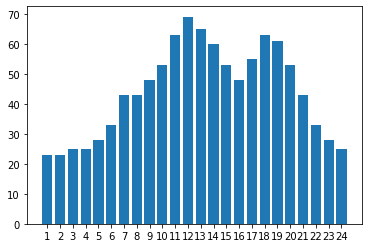

In [49]:
#電力需要の可視化
#Visualize Demand
import matplotlib.pyplot as plt
time = [i for i in range(1,25)]
plt.bar(time, kwh_Demand, tick_label=time)

In [50]:
#目的関数をセット
# set the objective function
#コスト関数
#cost function
problem += pulp.lpDot( c1, x1 ) + pulp.lpDot( c2, x2 ) +pulp.lpDot( c3, x3 ) +pulp.lpDot( cG, u )

In [51]:
#制約関数をセット
# set constraint function

#購入電力について、x1=5kWh,x2=10kWh,x3=20kWhと置いた。
#Purchased power is set as x1=5kWh, x2=10kWh, x3=20kWh.
for i in range(24):
    problem += 5*x1[i] + 10*x2[i] + 20*x3[i] + pulp.lpDot( u, kwh_G ) >= d[i]
    problem += x1[i] + x2[i] + x3[i] <= 1

In [52]:
#制約式と目的関数の確認
#Constraints and Objective Function Confirmation
print(problem)

energymane:
MINIMIZE
90*u_1 + 130*u_2 + 160*u_3 + 170*u_4 + 250*u_5 + 280*u_6 + 10*x1_1 + 10*x1_10 + 10*x1_11 + 10*x1_12 + 10*x1_13 + 10*x1_14 + 10*x1_15 + 10*x1_16 + 10*x1_17 + 10*x1_18 + 10*x1_19 + 10*x1_2 + 10*x1_20 + 10*x1_21 + 10*x1_22 + 10*x1_23 + 10*x1_24 + 10*x1_3 + 10*x1_4 + 10*x1_5 + 10*x1_6 + 10*x1_7 + 10*x1_8 + 10*x1_9 + 15*x2_1 + 15*x2_10 + 15*x2_11 + 15*x2_12 + 15*x2_13 + 15*x2_14 + 15*x2_15 + 15*x2_16 + 15*x2_17 + 15*x2_18 + 15*x2_19 + 15*x2_2 + 15*x2_20 + 15*x2_21 + 15*x2_22 + 15*x2_23 + 15*x2_24 + 15*x2_3 + 15*x2_4 + 15*x2_5 + 15*x2_6 + 15*x2_7 + 15*x2_8 + 15*x2_9 + 20*x3_1 + 20*x3_10 + 20*x3_11 + 20*x3_12 + 20*x3_13 + 20*x3_14 + 20*x3_15 + 20*x3_16 + 20*x3_17 + 20*x3_18 + 20*x3_19 + 20*x3_2 + 20*x3_20 + 20*x3_21 + 20*x3_22 + 20*x3_23 + 20*x3_24 + 20*x3_3 + 20*x3_4 + 20*x3_5 + 20*x3_6 + 20*x3_7 + 20*x3_8 + 20*x3_9 + 0
SUBJECT TO
_C1: 5 u_1 + 6 u_2 + 8 u_3 + 10 u_4 + 15 u_5 + 20 u_6 + 5 x1_1 + 10 x2_1
 + 20 x3_1 >= 10

_C2: x1_1 + x2_1 + x3_1 <= 1

_C3: 5 u_1 + 6 u_2 + 

In [53]:
# 解く Solve
result = problem.solve()

#結果の可視化。result=1でないと解けていない。
#Result check. It is not solved unless result=1.
print("result=",result)

result= 1


In [54]:
# 結果を出力
# output the result
print('objective value: {}'.format(pulp.value(problem.objective)))
print('solution')
for i in range(len(x1)):
    print('x1_{} = {}'.format( i+1, pulp.value(x1[i]) ))
    print('x2_{} = {}'.format( i+1, pulp.value(x2[i]) ))
    print('x3_{} = {}'.format( i+1, pulp.value(x3[i]) ))
for i in range(len(u)):
    print('u_{} = {}'.format( i+1, pulp.value(u[i]) ))

objective value: 730.0
solution
x1_1 = 0.0
x2_1 = 0.0
x3_1 = 0.0
x1_2 = 0.0
x2_2 = 0.0
x3_2 = 0.0
x1_3 = 0.0
x2_3 = 0.0
x3_3 = 0.0
x1_4 = 0.0
x2_4 = 0.0
x3_4 = 0.0
x1_5 = 0.0
x2_5 = 0.0
x3_5 = 0.0
x1_6 = 0.0
x2_6 = 0.0
x3_6 = 0.0
x1_7 = 0.0
x2_7 = 0.0
x3_7 = 0.0
x1_8 = 0.0
x2_8 = 0.0
x3_8 = 0.0
x1_9 = 0.0
x2_9 = 0.0
x3_9 = 0.0
x1_10 = 0.0
x2_10 = 0.0
x3_10 = 0.0
x1_11 = 0.0
x2_11 = 1.0
x3_11 = 0.0
x1_12 = 0.0
x2_12 = 0.0
x3_12 = 1.0
x1_13 = 0.0
x2_13 = 0.0
x3_13 = 1.0
x1_14 = 0.0
x2_14 = 1.0
x3_14 = 0.0
x1_15 = 0.0
x2_15 = 0.0
x3_15 = 0.0
x1_16 = 0.0
x2_16 = 0.0
x3_16 = 0.0
x1_17 = 1.0
x2_17 = 0.0
x3_17 = 0.0
x1_18 = 0.0
x2_18 = 1.0
x3_18 = 0.0
x1_19 = 0.0
x2_19 = 1.0
x3_19 = 0.0
x1_20 = 0.0
x2_20 = 0.0
x3_20 = 0.0
x1_21 = 0.0
x2_21 = 0.0
x3_21 = 0.0
x1_22 = 0.0
x2_22 = 0.0
x3_22 = 0.0
x1_23 = 0.0
x2_23 = 0.0
x3_23 = 0.0
x1_24 = 0.0
x2_24 = 0.0
x3_24 = 0.0
u_1 = 1.0
u_2 = 0.0
u_3 = 0.0
u_4 = 0.0
u_5 = 1.0
u_6 = 1.0
